In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [36]:
df=  pd.read_csv("fake_or_real_news.csv")

In [99]:
x = df['text']
y = df['label']

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [101]:
count_vectorizer = CountVectorizer(stop_words= 'english')

In [148]:
count_train = count_vectorizer.fit_transform(x_train)

In [149]:
count_test = count_vectorizer.transform(x_test)

In [104]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

In [124]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [125]:
tfidf_test = tfidf_vectorizer.transform(x_test)

In [126]:
clf = MultinomialNB()

In [127]:
clf.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [128]:
pred = clf.predict(tfidf_test)

In [133]:
score = accuracy_score(y_test,pred)

In [134]:
print("Accuracy:", score)

Accuracy: 0.8453038674033149


In [138]:
cm = confusion_matrix(y_test,pred, labels=['FAKE','REAL'])

In [140]:
cm

array([[443, 185],
       [ 11, 628]], dtype=int64)

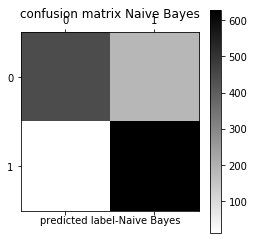

In [145]:
plt.matshow(cm, cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix Naive Bayes')
plt.colorbar()
plt.xlabel('predicted label-Naive Bayes')
plt.show()

In [150]:
clf.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [151]:
pred_c = clf.predict(count_test)

In [152]:
score1 = accuracy_score(y_test,pred_c)

In [153]:
print("accuracy:",score1)

accuracy: 0.898973954222573


In [154]:
cm1 = confusion_matrix(y_test,pred_c, labels=['FAKE','REAL'])

In [155]:
cm1

array([[544,  84],
       [ 44, 595]], dtype=int64)

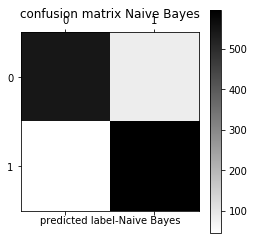

In [156]:
plt.matshow(cm1, cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix Naive Bayes')
plt.colorbar()
plt.xlabel('predicted label-Naive Bayes')
plt.show()